In [1]:
import numpy as np # linear algebra
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [3]:
#Let's read the data
data = pd.read_csv('Fin_News.csv', encoding='latin-1', names=['sentiment', 'text'])
data.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [6]:
# making list stopwords for removing stopwords from our text 
stop = set(stopwords.words('english'))
stop.update(punctuation)
print(stop)

{'him', 'under', 'her', 'their', "wasn't", "you've", ';', 'hadn', 'by', 'where', 'theirs', 'other', 'not', 't', 'myself', 'has', 'about', 'during', "needn't", 'once', 'there', 'been', 'again', 'or', 'these', 'll', 'needn', 'here', 'our', 'through', 'i', 'your', 'against', 'most', '`', "you're", 'they', 'ourselves', "you'd", 'for', 'very', "shouldn't", 'isn', 'those', 'doing', 'up', 'above', 'we', ',', "it's", "didn't", "won't", 'my', 'before', 'you', 'why', '?', 'a', '*', 'off', 'hers', "aren't", 'so', 'were', 'on', 'd', 'should', 'then', 'can', 'whom', 'them', 'this', 'did', '^', 'how', 'yourself', '(', ':', 'into', 'no', '{', '%', "mightn't", 'will', '"', 's', 'is', 'down', 'wasn', 'he', '\\', 'over', 'both', "don't", 'as', '$', 'from', '~', 'of', 'all', 'while', 'ma', 'the', '+', "haven't", 'yourselves', 'was', 'nor', 'too', "doesn't", "weren't", "'", 'herself', '[', 'm', 'me', 'after', 'each', 'than', 'because', 'same', '-', 'its', '>', "hadn't", 'itself', "isn't", 'more', 'wouldn'

In [7]:
# this function return the part of speech of a word.
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [8]:
# Function to clean our text.
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [15]:
data.text = data.text.apply(clean_review)
data.text = data.text.apply(join_text)

In [16]:
data.head()

,sentiment,text
0,neutral,According Gran company plan move production Ru...
1,neutral,"Technopolis plan develop stage area less 100,0..."
2,negative,international electronic industry company Elco...
3,positive,new production plant company would increase ca...
4,positive,According company 's update strategy year 2009...


In [17]:
# splitting data.
x_train,x_test,y_train,y_test = train_test_split(data.text,data.sentiment,test_size = 0.2 , random_state = 0)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3876,), (3876,), (970,), (970,))

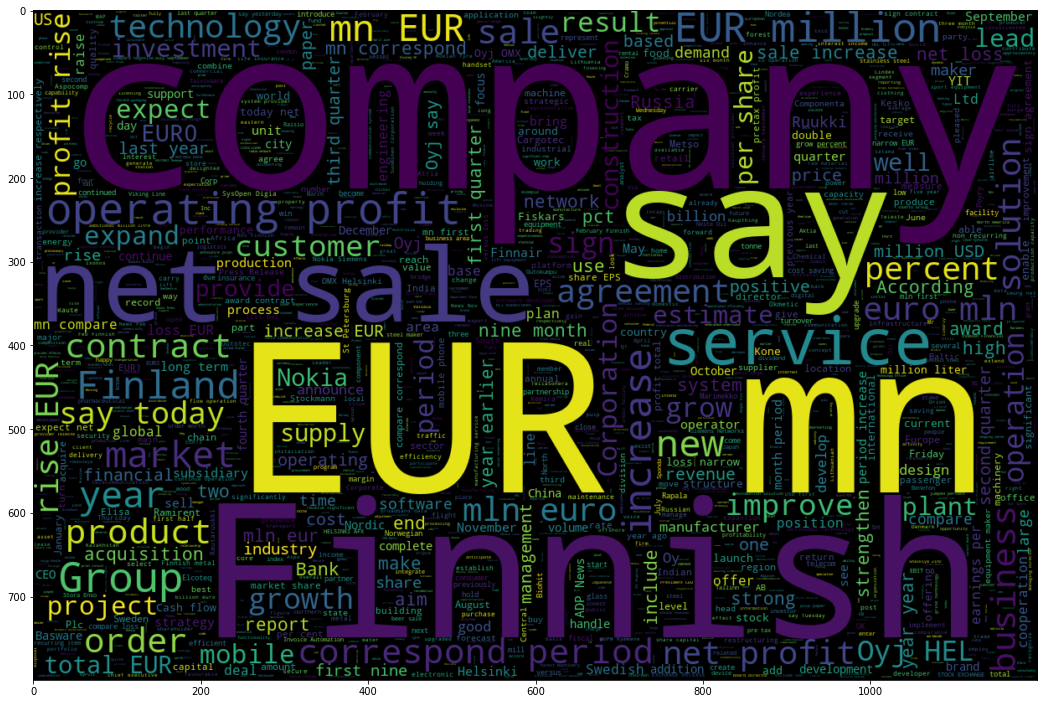

In [19]:
pos = x_train[y_train[y_train=='positive'].index]
neg = x_train[y_train[y_train=='negative'].index]
neutral = x_train[y_train[y_train=='negative'].index]

plt.figure(figsize = (18,24)) # Text Reviews with positive Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(pos))
plt.imshow(wordcloud,interpolation = 'bilinear')

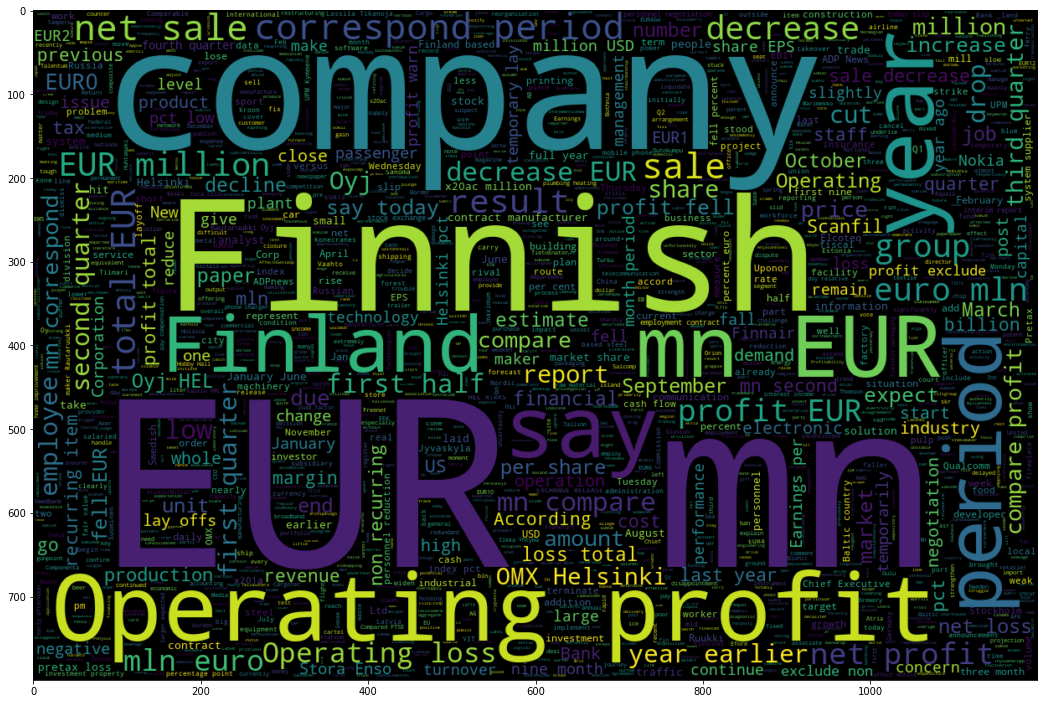

In [20]:
plt.figure(figsize = (18,24)) # Text Reviews with negative Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neg))
plt.imshow(wordcloud,interpolation = 'bilinear')

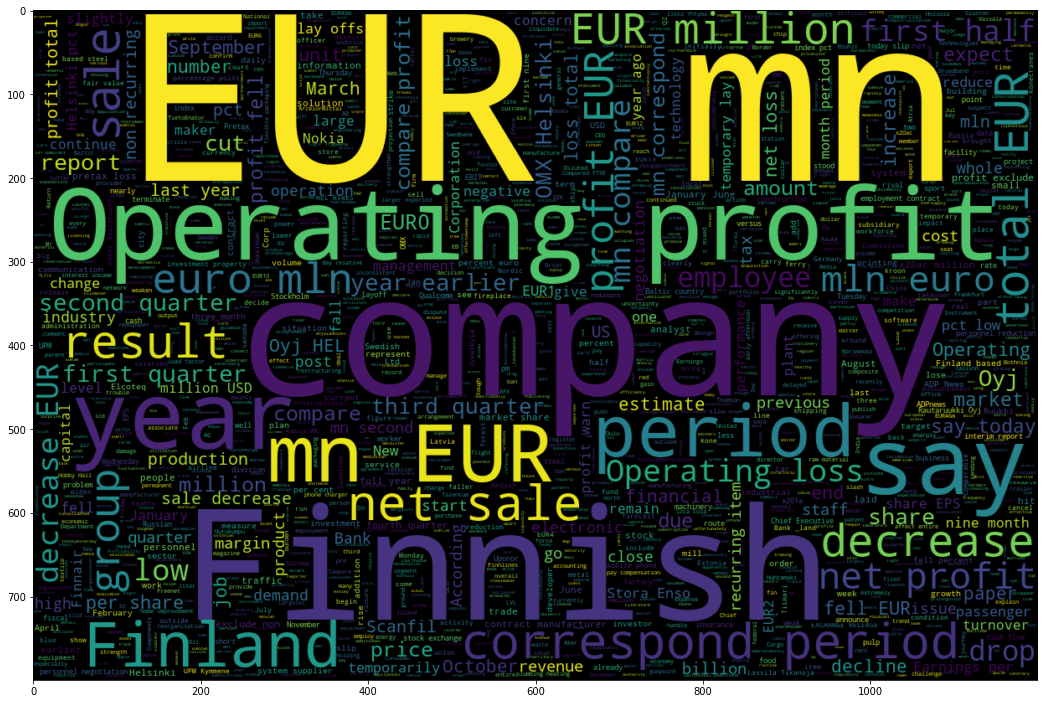

In [21]:
plt.figure(figsize = (18,24)) # Text Reviews with neutral Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neutral))
plt.imshow(wordcloud,interpolation = 'bilinear')

#### From above plots we can see few words like company and EUR are common to all three sentiments so we should remove these from our texts as they dont provide any information.

In [23]:
# creating a variable for count vectorizer which gives us features using the whole text of data.
count_vec = CountVectorizer(max_features=4000, ngram_range=(1,2), max_df=0.9, min_df=0)
# max_df insures to remove most frequent words as we discussed earlier.
# ngram_range is used to select words at a time like 1 or 2 like if a sentence have 'not happy' in text then it can mean two things if we pick the word 'happy' and pick the words 'not happy' both.

In [24]:
x_train_features = count_vec.fit_transform(x_train).todense()
x_test_features = count_vec.transform(x_test).todense()
x_train_features.shape, x_test_features.shape

((3876, 4000), (970, 4000))

In [25]:
#1. Multinomial NaiveBayes
nb_clf = MultinomialNB()
nb_clf.fit(x_train_features, y_train)
y_pred = nb_clf.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


71.1340206185567


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.52      0.54      0.53       128
     neutral       0.76      0.87      0.81       575
    positive       0.66      0.46      0.54       267

    accuracy                           0.71       970
   macro avg       0.65      0.62      0.63       970
weighted avg       0.70      0.71      0.70       970



In [27]:
lr = LogisticRegression()
lr.fit(x_train_features, y_train)
y_pred = lr.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


75.6701030927835


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.70      0.52      0.59       128
     neutral       0.78      0.88      0.83       575
    positive       0.70      0.60      0.65       267

    accuracy                           0.76       970
   macro avg       0.73      0.67      0.69       970
weighted avg       0.75      0.76      0.75       970



We can compare MultinomialNB and LogisticRegression performance, Based on accuracy LogisticRegression performed well